# Load IGLU tasks and encode for Minecraft Data Collection Platform

This is an example notebook of how to use gridworld to manipulate tasks. Sections include:
* How to load the IGLU dataset, iterating over tasks
* How to visualize the structures using matplotlib
* How to create custom gridworld tasks
* How to encode the tasks into a json file accepted by Minecraft Data Collection Platform
* How to store those tasks into a csv file with the format expected by the `generate_join_codes.py` script.

See ../README.md for setup instructions.

### Imports

Import local scripts

In [1]:
%run -i ../task_encoding/gridworld_task_to_minecraft_task_encoder.py

In [2]:
%run -i ../../../utils/grid_visualization.py

In [3]:
import pandas

In [4]:
from gridworld.data import SingleTurnIGLUDataset  # Or IGLUDataset for multiturn
from gridworld.tasks import Tasks, Task

## Load IGLU Dataset

In [5]:
iglu_dataset = SingleTurnIGLUDataset(task_kwargs={'invariant': True})
print(f'total structures: {len(iglu_dataset.tasks)}')
print(f'total sessions: {len(sum(iglu_dataset.tasks.values(), []))}')

downloading task dataset into /home/milagro/.iglu/data/single_turn_dataset


downloading task dataset: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.67it/s]


total structures: 711
total sessions: 3605


### Load a random task

`iglu_dataset.tasks` is a dictionary where the keys are the task_ids, and the values are lists with all the sessions. Each session corresponds to a different game played by the mturkers.

In [6]:
import numpy

singleturn_tasks = [(t_id, t) for t_id, t in iglu_dataset.tasks.items()]
random_task_id, random_task = singleturn_tasks[numpy.random.randint(len(singleturn_tasks))]
random_session = numpy.random.randint(len(random_task))
random_task = random_task[random_session]
random_task_id, random_session, random_task

('9-c136/step-10', 0, Task(instruction=<Architect> Place a ...))

In [7]:
random_task.full_size

15

In [185]:
random_task.chat

'<Architect> Facing west, walk forwards a little bit, then place a tower of four blue blocks.\n<Architect> Facing north, place a tower of four blue blocks two spaces to the right of the existing tower, then delete the left tower.\n<Architect> Facing north build six blue blocks from the bottom blue block towards the east. It will look like an L shape.'

In [186]:
random_task.last_instruction

'<Architect> Facing north build six blue blocks from the bottom blue block towards the east. It will look like an L shape.'

### Visualize structures

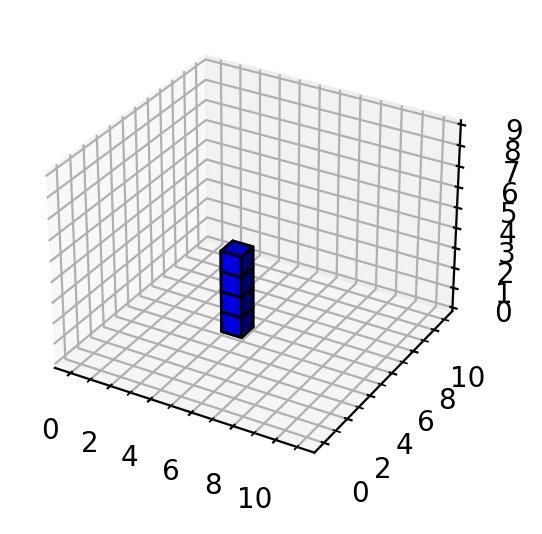

In [187]:
plot_grid(
    Tasks.to_dense(random_task.starting_grid), figsize=(3,3),
    fontsize=5);

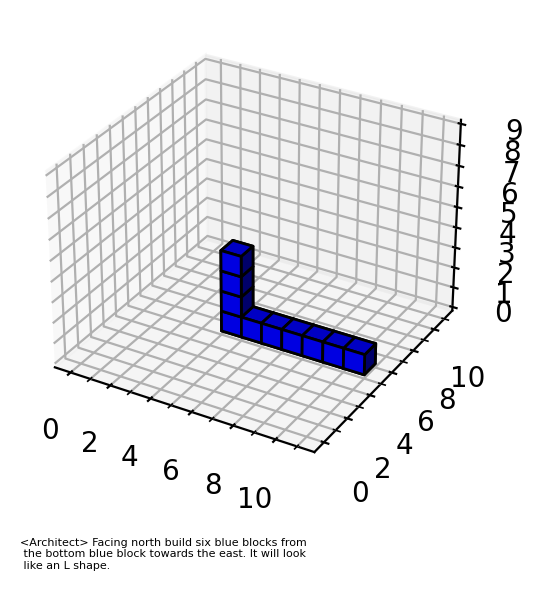

In [188]:
plot_grid(random_task.target_grid, figsize=(3,3), text=break_str_to_lines(random_task.last_instruction), fontsize=4);

## Create pandas Dataframe that will contain the metadata of generated tasks

## Convert task to json given the specific task ids

In [45]:
# Select some task ids and session ids

# Note: the step-N indicates the initial grid state was built after N turns.
selected_tasks = [
    # ('19-c126/step-10', 1),  # Blue and purple wall
    #('7-c97/step-2', 2),  # Orange corner
    #('2-c97/step-4', 7),  # Red and orange platform
    #('13-c139/step-2', 1),  # Red and yellow tower
    #('11-c27/step-4', 1),  # Big blue L shape
    ('16-c96/step-12', 0, 'medium_corners_'),
    ('14-c51/step-26', 0, 'medium_c_on_floor_'),
    ('13-c139/step-10', 0, 'medium_floating_armour_'),
    ('23-c135/step-6', 0, 'hard_cross_arm_'),
    ('33-c135/step-14', 0, 'medium_blue_cross_arm_'),
    ('14-c51/step-14', 0, 'easy_colored_wall_'),
    ('23-c127/step-2', 0, 'easy_destroy_yellow_wall_'),
    ('2-c139/step-14', 0, 'easy_destroy_wall_corner_'),
    ('14-c59/step-12', 0, 'hard_build_color_staircase_'),
    ('2-c135/step-14', 0, 'hard_destroy_right_arrow_'),
    ('19-c126/step-10', 0, 'medium_destroy_beer_mug_'),
    ('13-c139/step-8', 0, 'medium_destroy_happy_square_'),
    ('14-c58/step-16', 0, 'easy_build_l_on_floor_'),
    ('4-c92/step-12', 0, 'medium_destroy_tiny_red_block_'),
    ('5-c73/step-2', 0, 'easy_destroy_yellow_column_'),
    ('30-c96/step-10', 0, 'easy_destroy_corner_column_'),
]

/data/users/milagro/iglu/iglu-dataset-minecraft-evaluation/utils/grid_visualization.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize, dpi=200)
) missing from current font.s/iglu_dataset/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)


Error in callback <function _draw_all_if_interactive at 0x7f638c7ede50> (for post_execute):


AttributeError: eventson

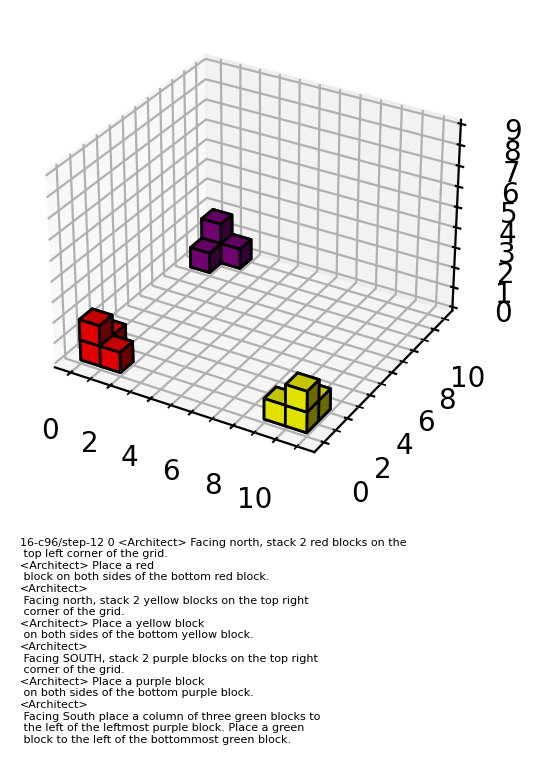

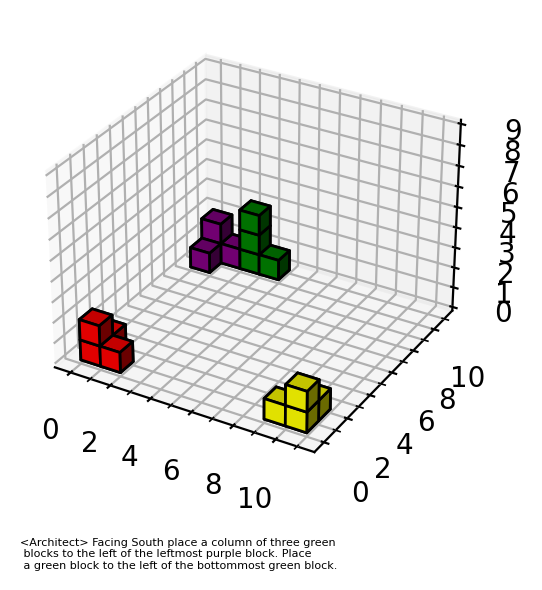

) missing from current font.s/iglu_dataset/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


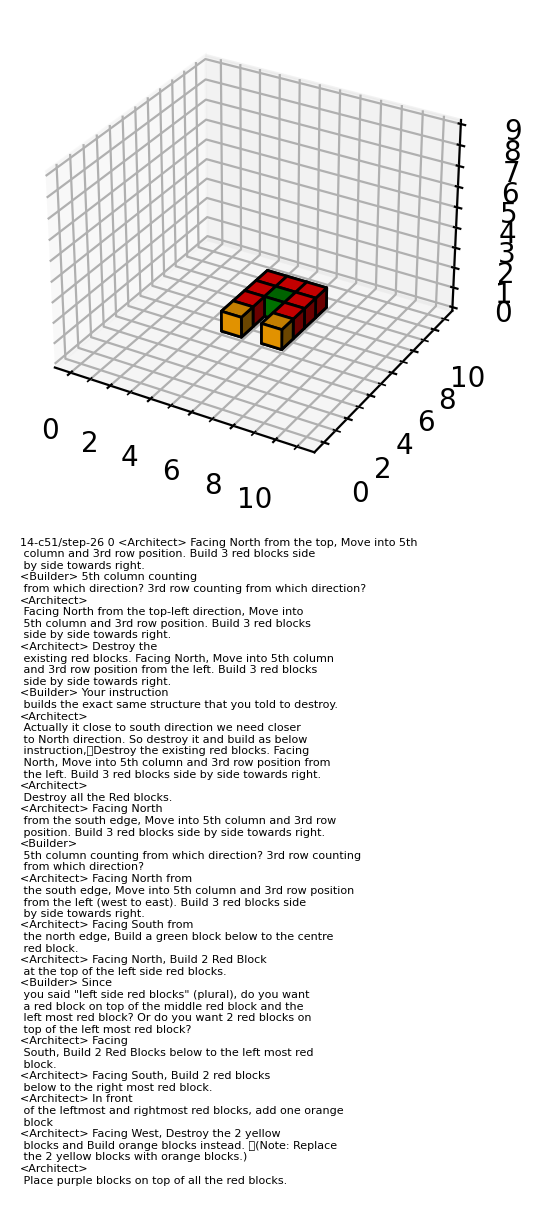

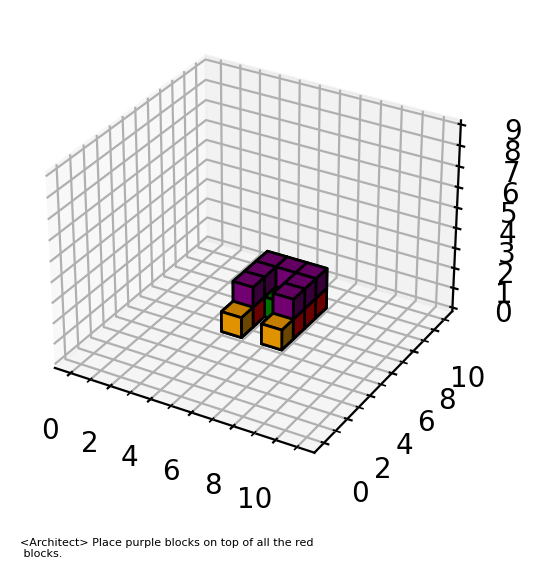

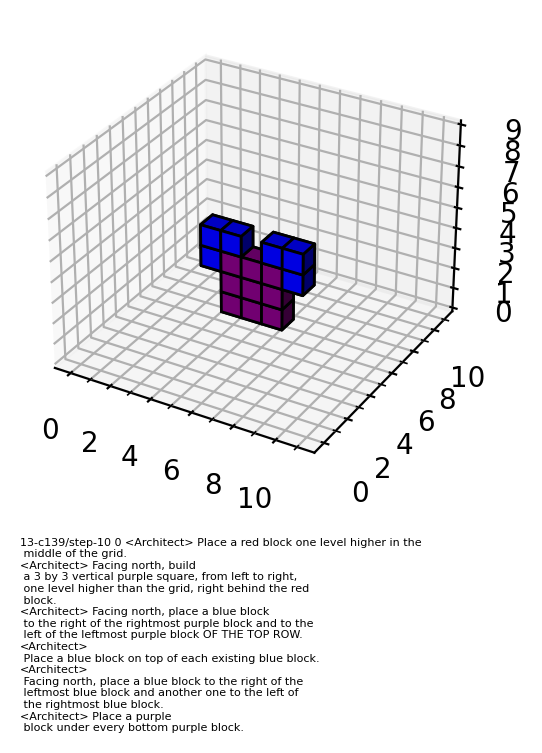

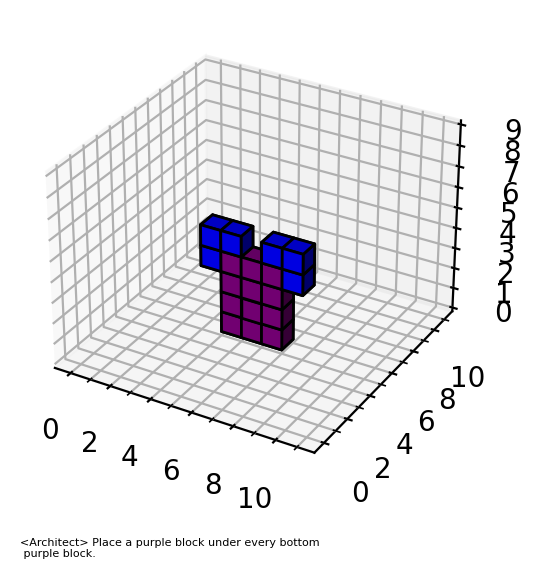

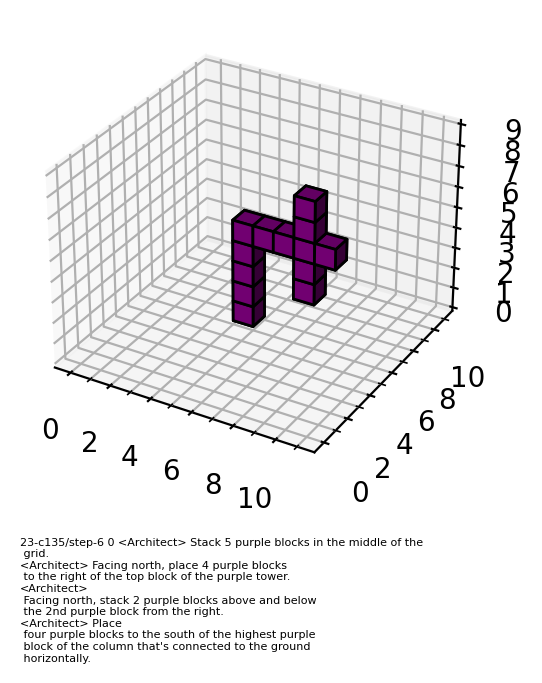

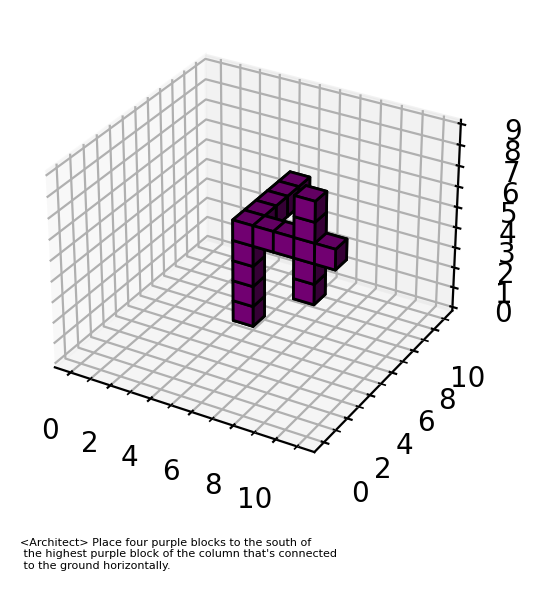

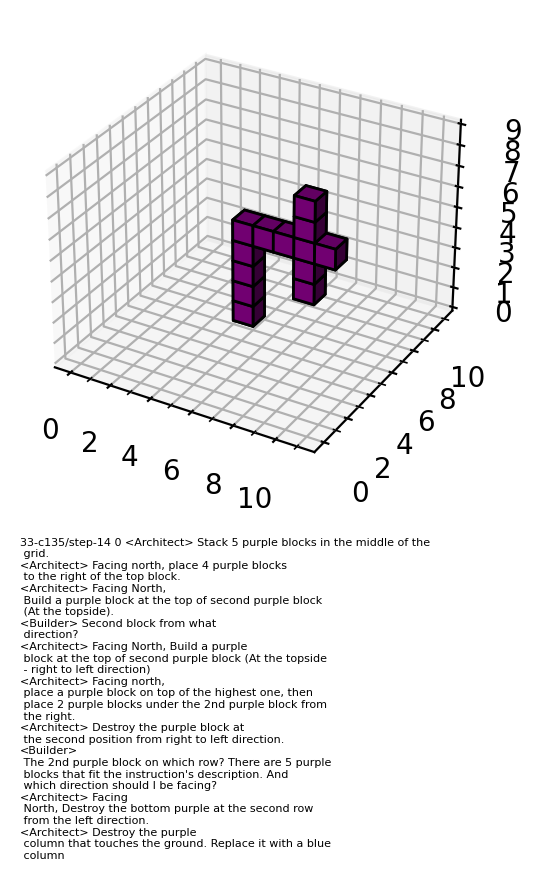

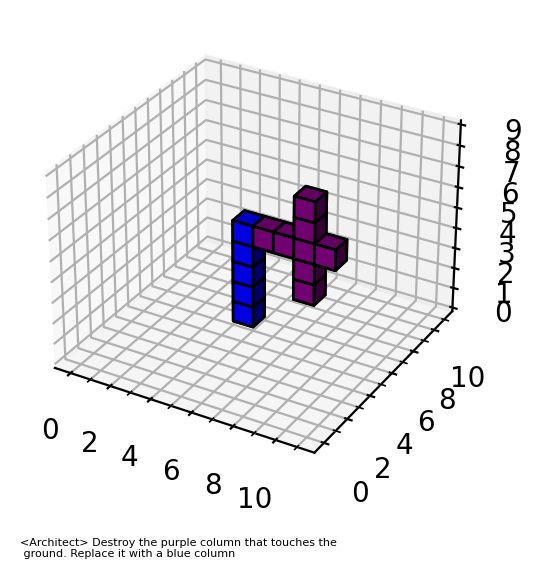

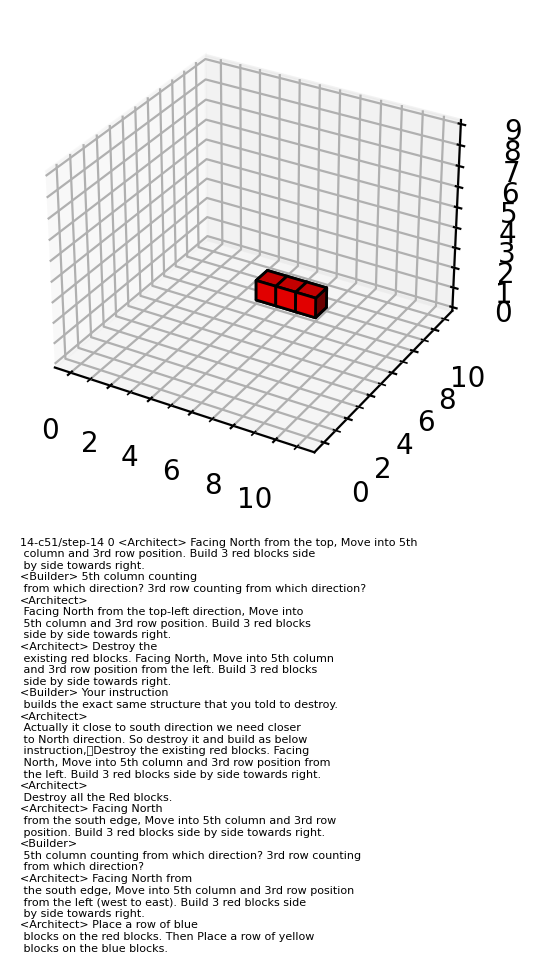

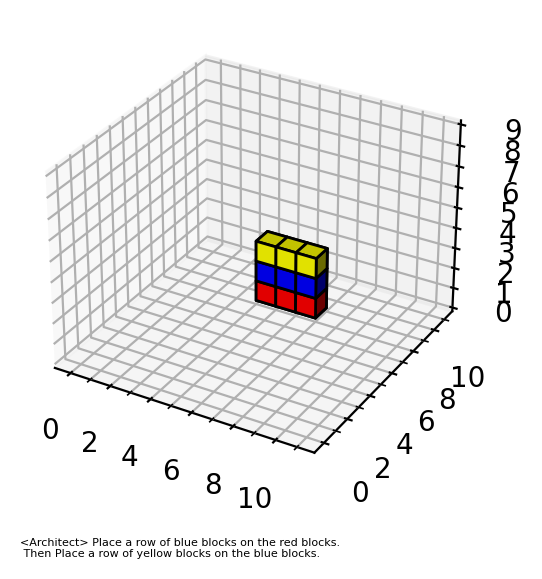

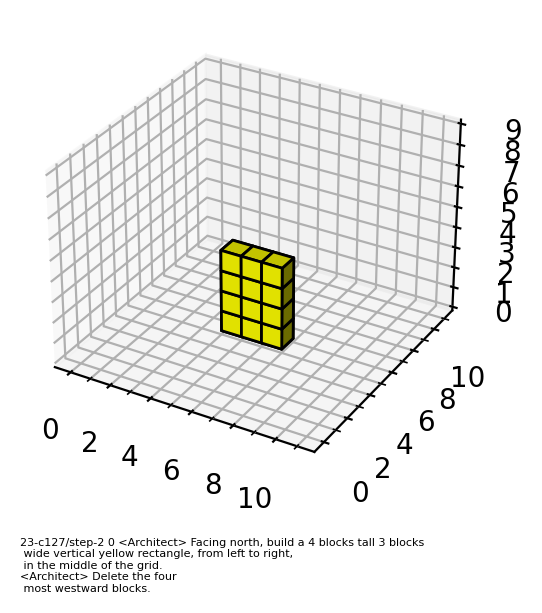

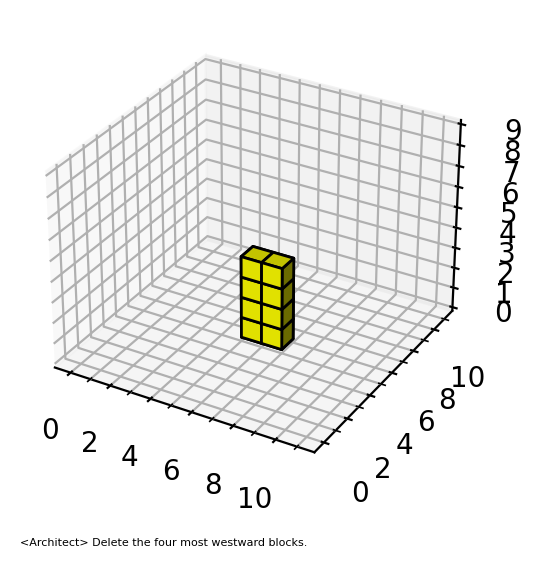

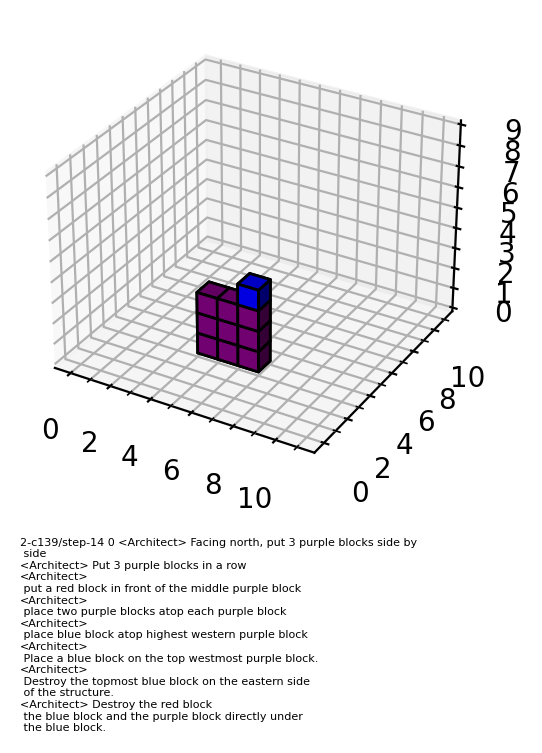

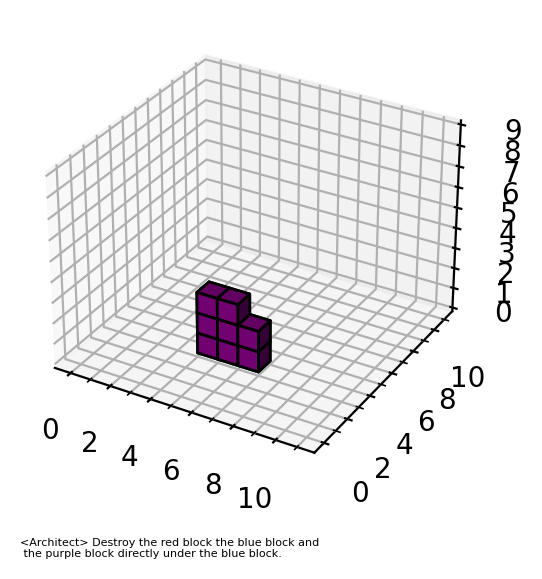

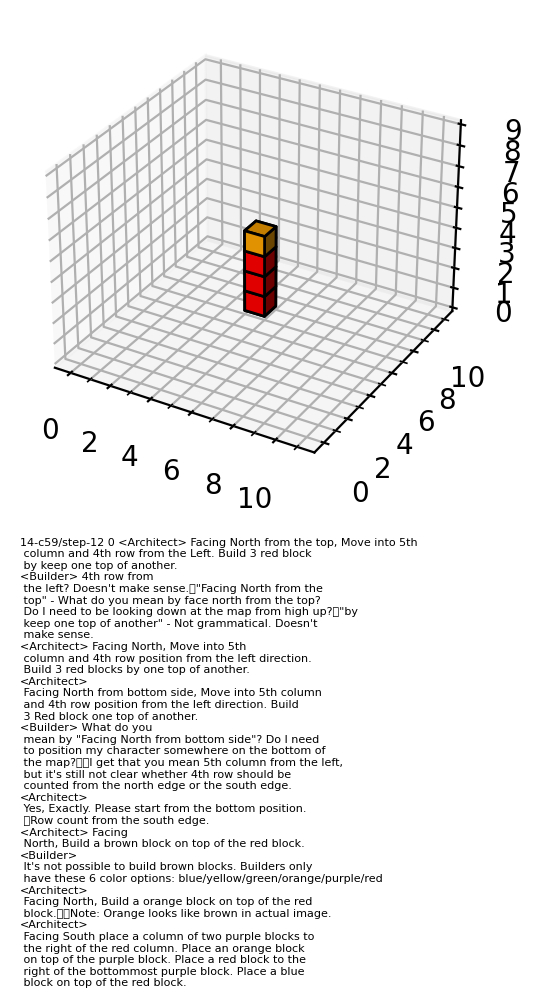

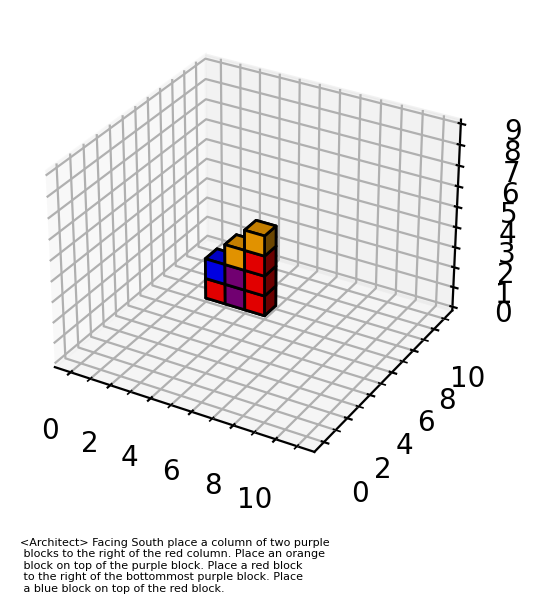

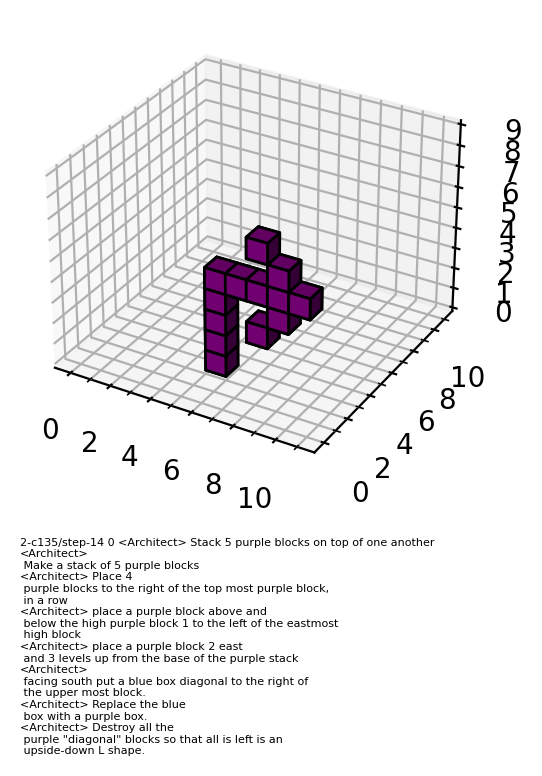

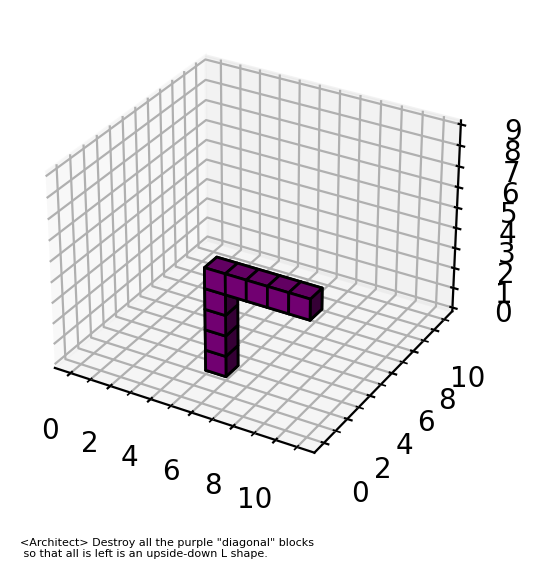

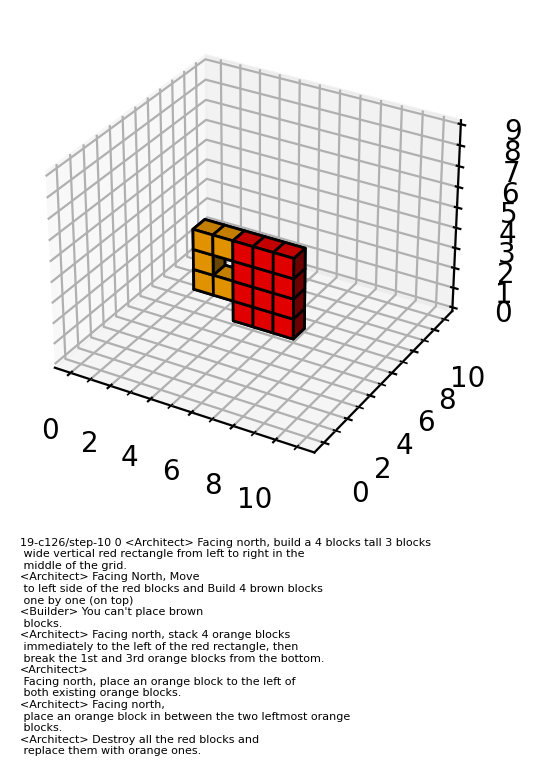

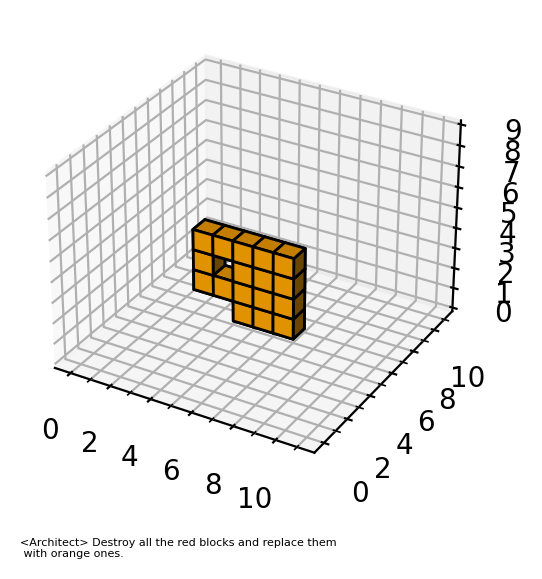

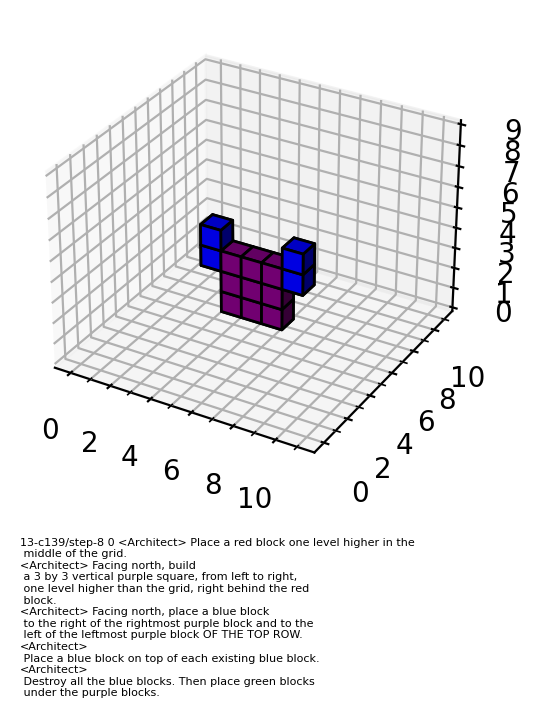

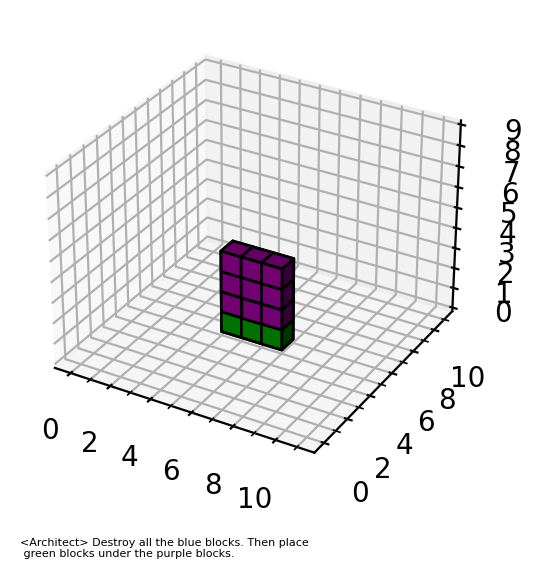

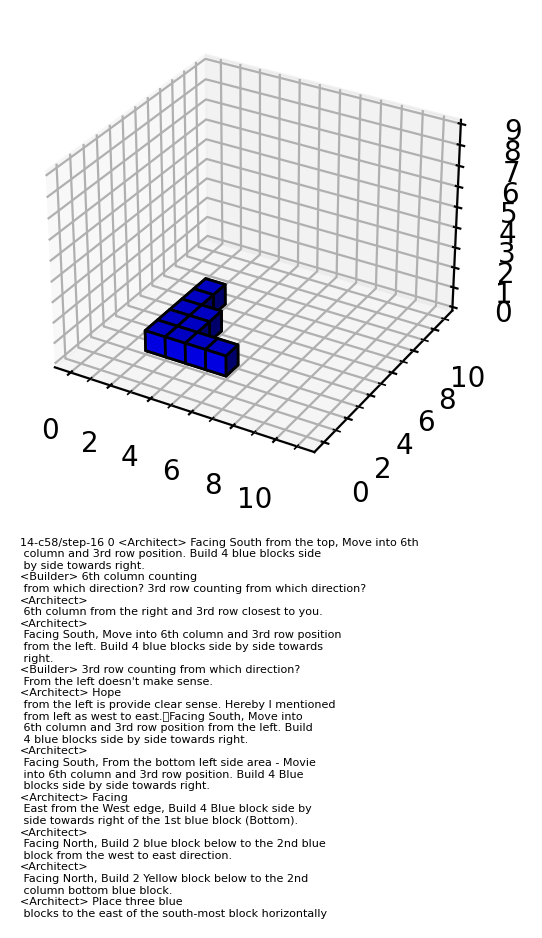

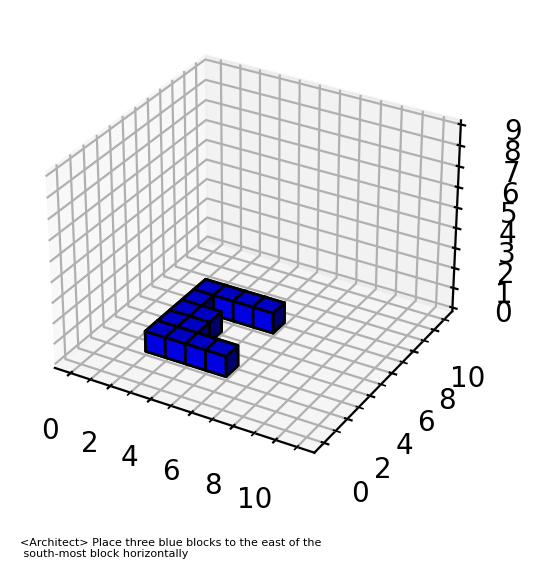

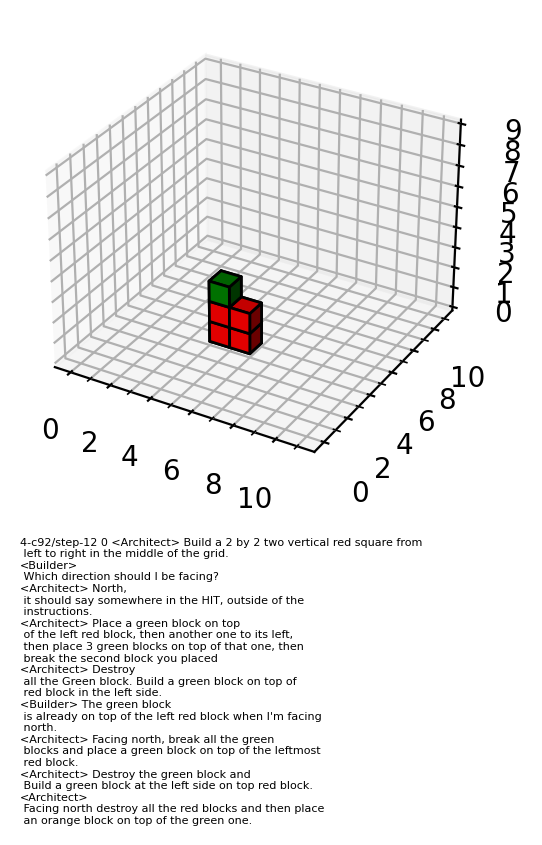

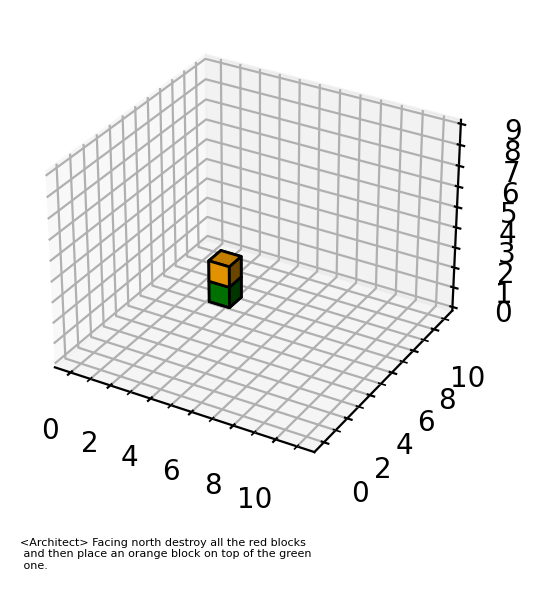

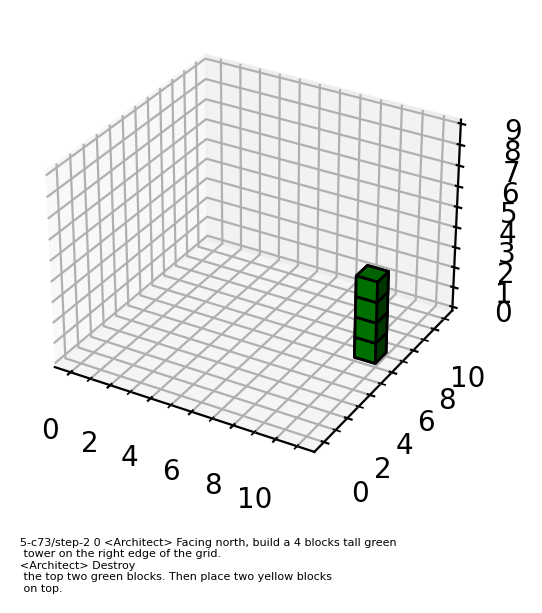

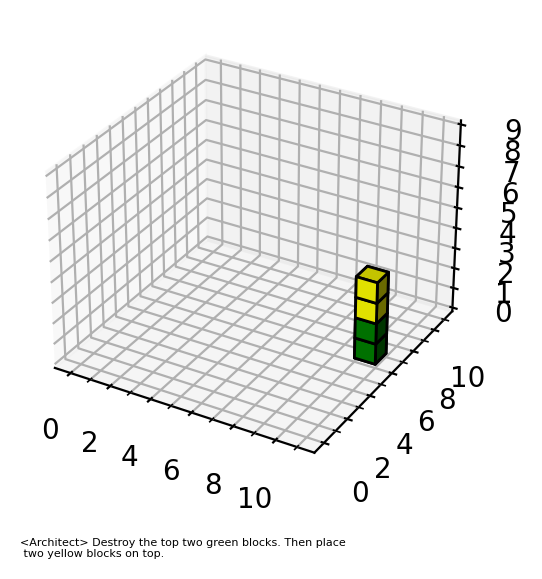

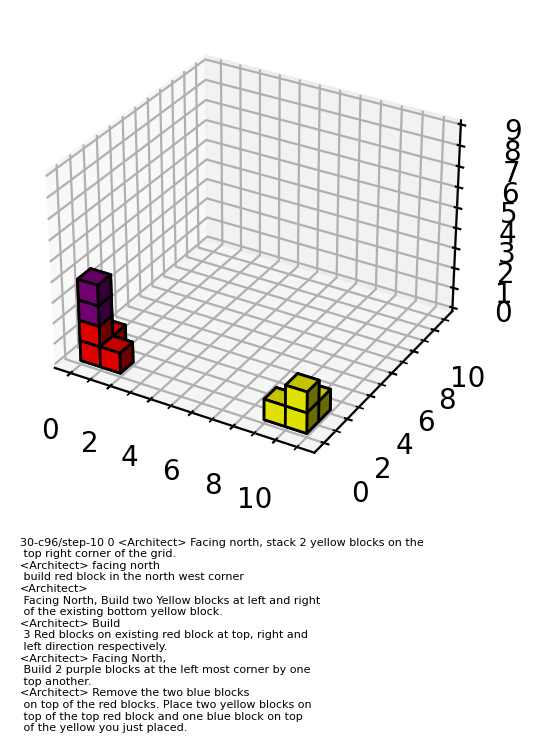

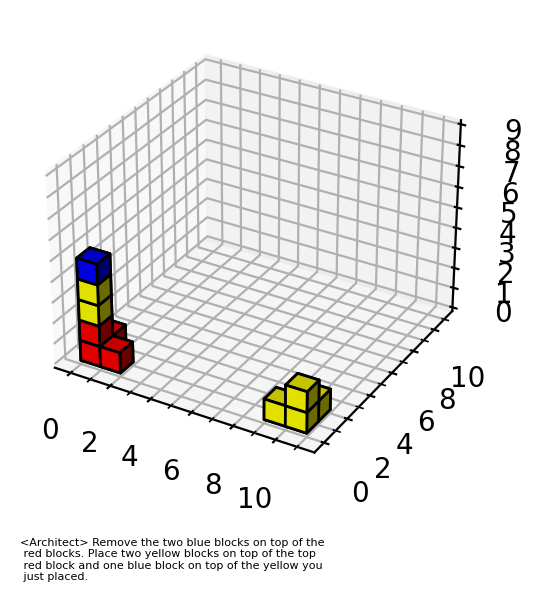

In [46]:
singleturn_tasks = [(t_id, t) for t_id, t in iglu_dataset.tasks.items()]
for task_id, session_id, task_name_prefix in selected_tasks:
    selected_task = iglu_dataset.tasks[task_id][session_id]
    plot_grid(Tasks.to_dense(selected_task.starting_grid), figsize=(3,3),
              text=' '.join([str(task_id), str(session_id), break_str_to_lines(selected_task.chat)]),
        fontsize=4);
    plot_grid(
        selected_task.target_grid, figsize=(3,3),
        text=break_str_to_lines(selected_task.last_instruction),
        fontsize=4);

#### WARNING!

Before running the following cell, check the architect and builder role are correct for the tournament.

In [47]:
import os

DEPLOYED_AGENT_TOURNAMENT_ARCHITECT_ROLE = '914a403c-d103-405f-a1d2-10fba7ee0a28'
DEPLOYED_AGENT_TOURNAMENT_BUILDER_ROLE = '77d0e089-6302-496b-9844-9f3e37961464'
DEPLOYED_TOURNAMENT_NAME = 'IGLU Testing (Prod)'

TEMPLATE_PATH = '../task_encoding/minecraft_task_template.json.j2'
TASK_DIR = '../../../../minecraf-evaluation-data/iglu_testing_prod'

task_encoder = GridworldTaskToMinecraftTaskEncoder(
    architect_role_id=DEPLOYED_AGENT_TOURNAMENT_ARCHITECT_ROLE,
    builder_role_id=DEPLOYED_AGENT_TOURNAMENT_BUILDER_ROLE,
    task_template_filepath=TEMPLATE_PATH
)

In [48]:
os.makedirs(TASK_DIR, exist_ok=True)

In [56]:
def add_metadata_to_df(task_name, task_filepath, gridworld_task_id=None, gridworld_task_session=None, gridworld_dataset=None):
    task_df_rows.append({
        'gridworld_dataset': gridworld_dataset,
        'gridworld_task_id': gridworld_task_id,
        'gridworld_task_session': gridworld_task_session,
        'task_name': task_name,
        'architect_role_id': DEPLOYED_AGENT_TOURNAMENT_ARCHITECT_ROLE,
        'builder_role_id': DEPLOYED_AGENT_TOURNAMENT_BUILDER_ROLE,
        'tournament_name': DEPLOYED_TOURNAMENT_NAME,
        'path_to_encoded_task': task_filepath,
    })
    
def convert_tasks(task_ids, suffix=''):
    """Generates and saves a json file for the task with @task_id from loaded iglu dataset."""
    for task_id, session, task_name_prefix in task_ids:
        iglu_task = iglu_dataset.tasks[task_id][session]
        task_name = task_name_prefix + task_id.replace('/', '-') + f'-{session}' + suffix
        minecraft_task_json = task_encoder.convert(
          task_name= task_name_prefix + task_id + suffix,
          task=iglu_task
        )
        task_filepath = os.path.join(TASK_DIR, task_name + '.json')
        with open(task_filepath, 'w') as task_file:
            task_file.write(minecraft_task_json)
        # IMPORTANT! Add tasks metadata to dataframe
        add_metadata_to_df(task_name, task_filepath,
                           gridworld_task_id=task_id, gridworld_task_session=session, 
                           gridworld_dataset=iglu_dataset.__class__.__name__)

def convert_empty_grid(task_ids, suffix=''):
    """
    Generates and saves a json file for the task with @task_id from loaded iglu dataset,
    but the starting grid is replaced by an empty grid.
    """
    for task_id, session, task_name_prefix in task_ids:
        iglu_task = iglu_dataset.tasks[task_id][session]
        task_name = task_name_prefix + task_id.replace('/', '-') + f'-{session}' + suffix
        new_task = Task(
            chat='',
            target_grid=iglu_task.target_grid,
            last_instruction='',
            starting_grid=[],
            full_grid=Tasks.to_dense(iglu_task.target_grid),
        )
        new_task_id = task_id + suffix
        minecraft_task_json = task_encoder.convert(
          task_name=new_task_id,
          task=new_task,
        )
        task_filepath = os.path.join(TASK_DIR, task_name + '.json')
        with open(task_filepath, 'w') as task_file:
            task_file.write(minecraft_task_json)
        add_metadata_to_df(new_task_id, task_filepath)  # This is not an technically an IGLU task because we altered the initial grid.

In [57]:
task_df_rows = []

In [58]:
convert_tasks(selected_tasks)

In [23]:
convert_empty_grid(selected_tasks)

In [59]:
len(task_df_rows)

16

## Create custom task

In [12]:
import numpy
from gridworld import utils
from gridworld.tasks import Task, Tasks

In [13]:
target_grid = numpy.zeros(utils.BUILD_ZONE_SIZE)

In [129]:
# Coordinates are x, y, z, where the lowest value of y is -1
custom_starting_grid = [(0, -1, 0, utils.BLUE), (0, 0, 0, utils.BLUE), (0, 1, 0, utils.BLUE)]
custom_target_grid = custom_starting_grid + [(1, -1, 0, utils.RED), (1, 0, 0, utils.RED),
                                             (1, 1, 0, utils.RED), (1, 2, 0, utils.RED)]
last_instruction = '<Architect> Make a column of 4 red blocks next to it'
chat = ['<Architect> Make a column of three blue blocks', last_instruction]
custom_task = Task(
    chat='\n'.join(chat),
    target_grid=Tasks.to_dense(custom_target_grid),
    starting_grid=custom_starting_grid,
    last_instruction=last_instruction
)

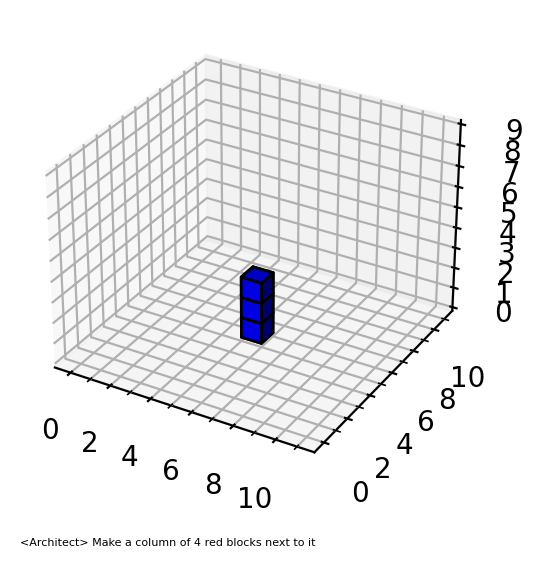

In [130]:
plot_grid(
    Tasks.to_dense(custom_task.starting_grid), figsize=(3,3),
    text=break_str_to_lines(custom_task.last_instruction), fontsize=4);

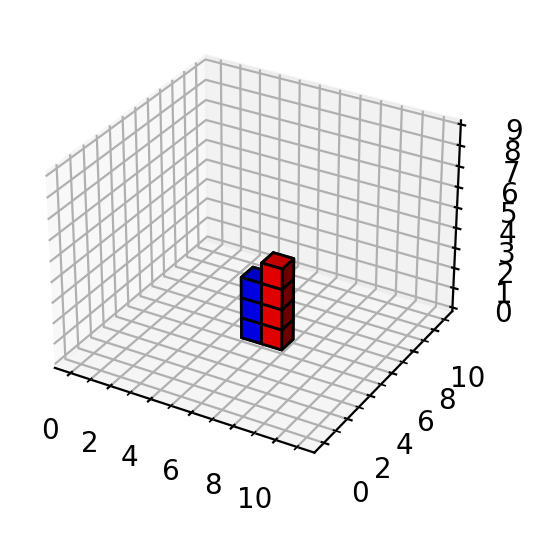

In [131]:
plot_grid(custom_task.target_grid, figsize=(3,3), fontsize=4);

In [132]:
task_id = 'my awesome task id'

minecraft_task_json = task_encoder.convert(
  task_name=task_id,  # IMPORTANT! DO NOT CREATE TASKS WITH SAME NAME EVEN IF THEY HAVE DIFFERENT IDS.
  task=custom_task
)

task_filepath = os.path.join(TASK_DIR, task_id.replace('/', '-') + '.json')
with open(task_filepath, 'w') as task_file:
    task_file.write(minecraft_task_json)
task_df_rows.append({
    'gridworld_dataset': None,
    'gridworld_task_id': None,
    'gridworld_task_session': None,
    'task_name': task_id,
    'architect_role_id': DEPLOYED_AGENT_TOURNAMENT_ARCHITECT_ROLE,
    'builder_role_id': DEPLOYED_AGENT_TOURNAMENT_BUILDER_ROLE,
    'path_to_encoded_task': task_filepath,
})

### Save dataframe with task metadata

In [53]:
task_df = pandas.DataFrame(data=task_df_rows)

In [54]:
task_df

gridworld_dataset gridworld_task_id  gridworld_task_session  \
0   SingleTurnIGLUDataset    16-c96/step-12                       0   
1   SingleTurnIGLUDataset    14-c51/step-26                       0   
2   SingleTurnIGLUDataset   13-c139/step-10                       0   
3   SingleTurnIGLUDataset    23-c135/step-6                       0   
4   SingleTurnIGLUDataset   33-c135/step-14                       0   
5   SingleTurnIGLUDataset    14-c51/step-14                       0   
6   SingleTurnIGLUDataset    23-c127/step-2                       0   
7   SingleTurnIGLUDataset    2-c139/step-14                       0   
8   SingleTurnIGLUDataset    14-c59/step-12                       0   
9   SingleTurnIGLUDataset    2-c135/step-14                       0   
10  SingleTurnIGLUDataset   19-c126/step-10                       0   
11  SingleTurnIGLUDataset    13-c139/step-8                       0   
12  SingleTurnIGLUDataset    14-c58/step-16                       0   
13  SingleTurnIGLUDataset     4-c92/step-12                       0   
14  SingleTurnIGLUDataset      5-c73/step-2                       0   
15  SingleTurnIGLUDataset    30-c96/step-10                       0   

                                        task_name  \
0                 medium_corners_16-c96-step-12-0   
1              medium_c_on_floor_14-c51-step-26-0   
2        medium_floating_armour_13-c139-step-10-0   
3                 hard_cross_arm_23-c135-step-6-0   
4         medium_blue_cross_arm_33-c135-step-14-0   
5              easy_colored_wall_14-c51-step-14-0   
6       easy_destroy_yellow_wall_23-c127-step-2-0   
7       easy_destroy_wall_corner_2-c139-step-14-0   
8     hard_build_color_staircase_14-c59-step-12-0   
9       hard_destroy_right_arrow_2-c135-step-14-0   
10      medium_destroy_beer_mug_19-c126-step-10-0   
11   medium_destroy_happy_square_13-c139-step-8-0   
12         easy_build_l_on_floor_14-c58-step-16-0   
13  medium_destroy_tiny_red_block_4-c92-step-12-0   
14      easy_destroy_yellow_column_5-c73-step-2-0   
15    easy_destroy_corner_column_30-c96-step-10-0   

                       architect_role_id  \
0   914a403c-d103-405f-a1d2-10fba7ee0a28   
1   914a403c-d103-405f-a1d2-10fba7ee0a28   
2   914a403c-d103-405f-a1d2-10fba7ee0a28   
3   914a403c-d103-405f-a1d2-10fba7ee0a28   
4   914a403c-d103-405f-a1d2-10fba7ee0a28   
5   914a403c-d103-405f-a1d2-10fba7ee0a28   
6   914a403c-d103-405f-a1d2-10fba7ee0a28   
7   914a403c-d103-405f-a1d2-10fba7ee0a28   
8   914a403c-d103-405f-a1d2-10fba7ee0a28   
9   914a403c-d103-405f-a1d2-10fba7ee0a28   
10  914a403c-d103-405f-a1d2-10fba7ee0a28   
11  914a403c-d103-405f-a1d2-10fba7ee0a28   
12  914a403c-d103-405f-a1d2-10fba7ee0a28   
13  914a403c-d103-405f-a1d2-10fba7ee0a28   
14  914a403c-d103-405f-a1d2-10fba7ee0a28   
15  914a403c-d103-405f-a1d2-10fba7ee0a28   

                         builder_role_id      tournament_name  \
0   77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   
1   77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   
2   77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   
3   77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   
4   77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   
5   77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   
6   77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   
7   77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   
8   77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   
9   77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   
10  77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   
11  77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   
12  77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   
13  77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   
14  77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   
15  77d0e089-6302-496b-9844-9f3e37961464  IGLU Testing (Prod)   

                                 path_to_en

In [55]:
task_df.to_csv(os.path.join(TASK_DIR, 'test_tasks_metadata.csv'), index=False)